In [72]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [74]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [75]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [76]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [77]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests as req

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [78]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | catuday
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | jalu
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | letterkenny
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | aitape
Processing Record 19 of Set 1 | fakse ladeplads
Processing Record 20 of Set 1 | mogadishu
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | xichang


Processing Record 39 of Set 4 | aksu
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | artyk
City not found. Skipping...
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | kitimat
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | okahandja
Processing Record 46 of Set 4 | ursulo galvan
Processing Record 47 of Set 4 | palora
Processing Record 48 of Set 4 | ntungamo
Processing Record 49 of Set 4 | eyl
Processing Record 50 of Set 4 | malakwal
Processing Record 1 of Set 5 | copiapo
Processing Record 2 of Set 5 | nizhniy kuranakh
Processing Record 3 of Set 5 | suleja
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | debre sina
Processing Record 8 of Set 5 | verkhnetulomskiy
Processing Record 9 of Set 5 | esso
Processing Record 10 of Set 5 | port hardy
Processing Record 11 of Set 5 | trang
Processing Record 12 of Set 5 | n

Processing Record 30 of Set 8 | susangerd
Processing Record 31 of Set 8 | namatanai
Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | twentynine palms
Processing Record 35 of Set 8 | antofagasta
Processing Record 36 of Set 8 | linares
Processing Record 37 of Set 8 | pevek
Processing Record 38 of Set 8 | la ronge
Processing Record 39 of Set 8 | sassandra
Processing Record 40 of Set 8 | najran
Processing Record 41 of Set 8 | atikokan
Processing Record 42 of Set 8 | warqla
City not found. Skipping...
Processing Record 43 of Set 8 | vila velha
Processing Record 44 of Set 8 | adwa
Processing Record 45 of Set 8 | flin flon
Processing Record 46 of Set 8 | haicheng
Processing Record 47 of Set 8 | elliot
Processing Record 48 of Set 8 | nizhnyaya tavda
Processing Record 49 of Set 8 | deputatskiy
Processing Record 50 of Set 8 | husavik
Processing Record 1 of Set 9 | erenhot
Processing Record 2 of Set 9 | keshan
City not found. Skipping.

Processing Record 18 of Set 12 | pathein
Processing Record 19 of Set 12 | sola
Processing Record 20 of Set 12 | gazanjyk
Processing Record 21 of Set 12 | verkh-suetka
Processing Record 22 of Set 12 | jining
Processing Record 23 of Set 12 | hithadhoo
Processing Record 24 of Set 12 | cesena
Processing Record 25 of Set 12 | kieta
Processing Record 26 of Set 12 | tuatapere
Processing Record 27 of Set 12 | florianopolis
Processing Record 28 of Set 12 | bonthe
Processing Record 29 of Set 12 | yeltsovka
City not found. Skipping...
Processing Record 30 of Set 12 | kuusamo
Processing Record 31 of Set 12 | nuevo progreso
Processing Record 32 of Set 12 | alotau
City not found. Skipping...
Processing Record 33 of Set 12 | alta floresta
Processing Record 34 of Set 12 | isla vista
Processing Record 35 of Set 12 | shenjiamen
Processing Record 36 of Set 12 | tornio
Processing Record 37 of Set 12 | laguna
Processing Record 38 of Set 12 | namibe
Processing Record 39 of Set 12 | honavar
Processing Record

In [79]:
len(city_data)

563

In [80]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Catuday,16.2923,119.8062,80.10,78,5,5.44,PH,2021-05-23 21:11:35
1,Kavaratti,10.5669,72.6420,83.23,74,98,7.61,IN,2021-05-23 21:11:36
2,Hobart,-42.8794,147.3294,44.28,90,0,4.00,AU,2021-05-23 21:11:36
3,Busselton,-33.6500,115.3333,45.05,65,78,16.37,AU,2021-05-23 21:11:37
4,Jamestown,42.0970,-79.2353,79.92,73,90,10.36,US,2021-05-23 21:11:37
5,Punta Arenas,-53.1500,-70.9167,39.31,81,40,9.53,CL,2021-05-23 21:07:26
6,Georgetown,5.4112,100.3354,82.89,85,20,4.50,MY,2021-05-23 21:10:04
7,Mount Gambier,-37.8333,140.7667,59.49,55,100,12.26,AU,2021-05-23 21:11:38
8,Mahebourg,-20.4081,57.7000,70.25,79,72,13.00,MU,2021-05-23 21:11:38
9,Jalu,29.0331,21.5482,78.62,16,0,8.03,LY,2021-05-23 21:11:39


In [81]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Catuday,PH,2021-05-23 21:11:35,16.2923,119.8062,80.10,78,5,5.44
1,Kavaratti,IN,2021-05-23 21:11:36,10.5669,72.6420,83.23,74,98,7.61
2,Hobart,AU,2021-05-23 21:11:36,-42.8794,147.3294,44.28,90,0,4.00
3,Busselton,AU,2021-05-23 21:11:37,-33.6500,115.3333,45.05,65,78,16.37
4,Jamestown,US,2021-05-23 21:11:37,42.0970,-79.2353,79.92,73,90,10.36
5,Punta Arenas,CL,2021-05-23 21:07:26,-53.1500,-70.9167,39.31,81,40,9.53
6,Georgetown,MY,2021-05-23 21:10:04,5.4112,100.3354,82.89,85,20,4.50
7,Mount Gambier,AU,2021-05-23 21:11:38,-37.8333,140.7667,59.49,55,100,12.26
8,Mahebourg,MU,2021-05-23 21:11:38,-20.4081,57.7000,70.25,79,72,13.00
9,Jalu,LY,2021-05-23 21:11:39,29.0331,21.5482,78.62,16,0,8.03


In [82]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [83]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

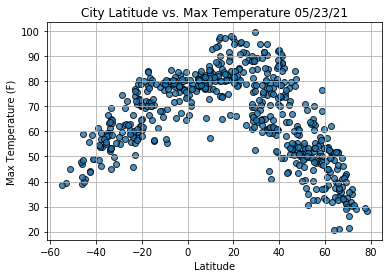

In [84]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

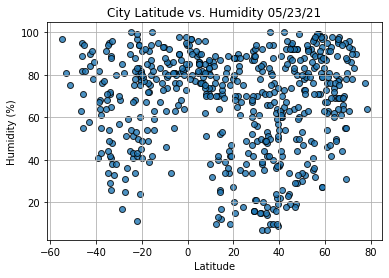

In [85]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

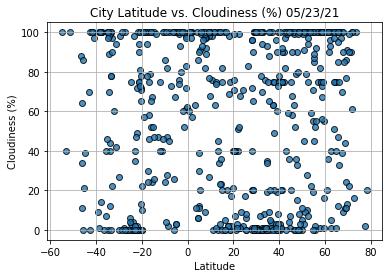

In [86]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

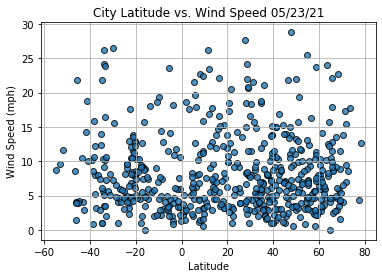

In [87]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [88]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [89]:
index13 = city_data_df.loc[13]
index13

City                    Ostrovnoy
Country                        RU
Date          2021-05-23 21:11:40
Lat                       68.0531
Lng                       39.5131
Max Temp                    33.26
Humidity                       66
Cloudiness                      9
Wind Speed                   2.89
Name: 13, dtype: object

In [90]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
558     True
559     True
560    False
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [91]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Catuday,PH,2021-05-23 21:11:35,16.2923,119.8062,80.10,78,5,5.44
1,Kavaratti,IN,2021-05-23 21:11:36,10.5669,72.6420,83.23,74,98,7.61
4,Jamestown,US,2021-05-23 21:11:37,42.0970,-79.2353,79.92,73,90,10.36
6,Georgetown,MY,2021-05-23 21:10:04,5.4112,100.3354,82.89,85,20,4.50
9,Jalu,LY,2021-05-23 21:11:39,29.0331,21.5482,78.62,16,0,8.03


In [92]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

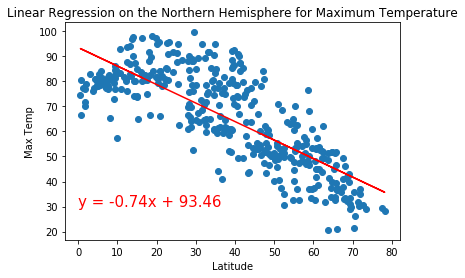

In [103]:
# Linear regression on the Northern Hemisphere for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,30))

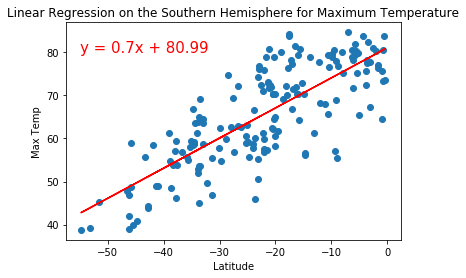

In [104]:
# Linear regression on the Southern Hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

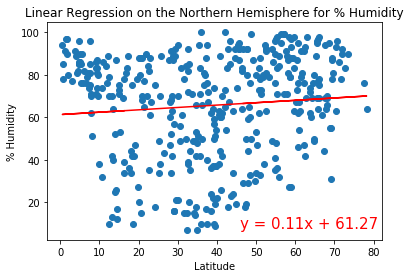

In [108]:
# Linear regression on the Northern Hemisphere for humidity
plt.title("Linear Regression on the Northern Hemisphere for % Humidity")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(46,8))

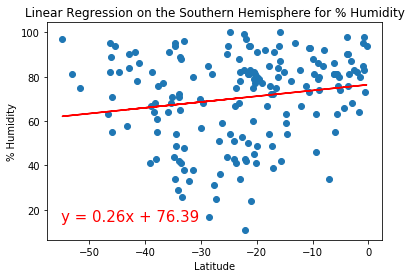

In [109]:
# Linear regression on the Southern Hemisphere for humidity
plt.title("Linear Regression on the Southern Hemisphere for % Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,15))

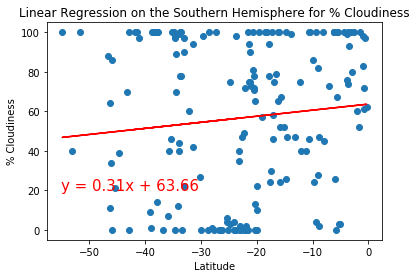

In [111]:
# Linear regression on the Southern Hemisphere for cloudiness
plt.title("Linear Regression on the Southern Hemisphere for % Cloudiness")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,20))

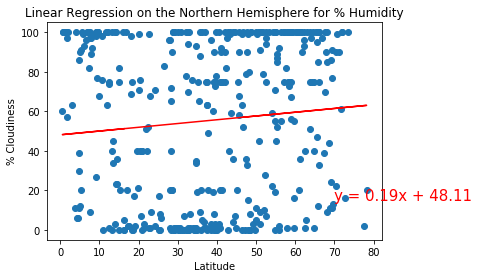

In [98]:
# Linear regression on the Northern Hemisphere for cloudiness
plt.title("Linear Regression on the Northern Hemisphere for % Humidity")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(70,15))

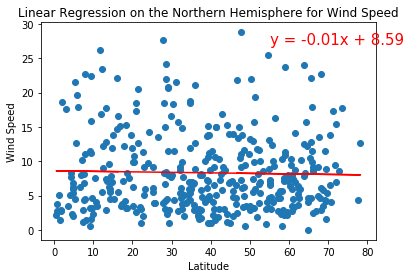

In [113]:
# Linear regression on the Northern Hemisphere
plt.title("Linear Regression on the Northern Hemisphere for Wind Speed")
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(55,27))

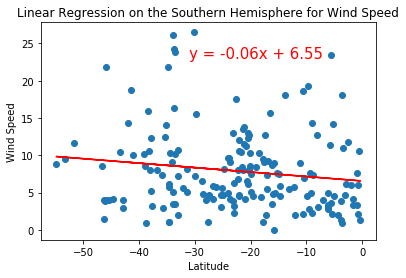

In [116]:
# Linear regression on the Southern Hemisphere
plt.title("Linear Regression on the Southern Hemisphere for Wind Speed")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-31,23))